In [1]:
# Replicating https://towardsdatascience.com/image-captioning-using-deep-learning-fe0d929cf337
# Authors
# Xiaoning Zhu and Miguel Xochicale

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xml.etree.ElementTree as ET
import os
import cv2

from wordcloud import WordCloud
import re

# from collections import defaultdict
# from collections import Counter
# import itertools



In [2]:

###########################################
## CHANGE THIS PATHS BASED ON YOUR SYSTEM
HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/budai4medtech/amir/'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH
FULL_DATASET_PATH = FULL_REPO_PATH  + 'datasets/'

print(f'FULL_DATASET_PATH: {FULL_DATASET_PATH}' )
dir = FULL_DATASET_PATH + 'ecgen-radiology'


# dir = "/content/drive/MyDrive/Colab Notebooks/dissertation/ecgen-radiology"


FULL_DATASET_PATH: /home/mxochicale/repositories/budai4medtech/amir/datasets/


In [3]:
# extracting data from the xml documents
img = []
img_impression = []
img_finding = []
for filename in tqdm(os.listdir(dir)):
    if filename.endswith(".xml"):
        f = dir + '/' + filename
        tree = ET.parse(f)
        root = tree.getroot()
        for child in root:
            if child.tag == 'MedlineCitation':
                for attr in child:
                    if attr.tag == 'Article':
                        for i in attr:
                            if i.tag == 'Abstract':
                                for name in i:
                                    if name.get('Label') == 'FINDINGS':
                                        finding=name.text
                                        
        for p_image in root.findall('parentImage'):
            
            img.append(p_image.get('id'))
            img_finding.append(finding)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11425/11425 [00:00<00:00, 15711.45it/s]


In [4]:
dataset = pd.DataFrame()
dataset['Image_path'] = img
dataset['Finding'] = img_finding

In [5]:
dataset.head(10)


,Image_path,Finding
0,CXR4_IM-2050-1001,There are diffuse bilateral interstitial and a...
1,CXR4_IM-2050-2001,There are diffuse bilateral interstitial and a...
2,CXR3265_IM-1551-1001,The heart size and mediastinal contours appear...
3,CXR3265_IM-1551-2001,The heart size and mediastinal contours appear...
4,CXR3044_IM-1418-1001,The XXXX examination consists of frontal and l...
5,CXR3044_IM-1418-2001,The XXXX examination consists of frontal and l...
6,CXR2937_IM-1339-1001,The heart size and mediastinal contours appear...
7,CXR2937_IM-1339-2001,The heart size and mediastinal contours appear...
8,CXR1222_IM-0150-1001,The heart and lungs have XXXX XXXX in the inte...
9,CXR1222_IM-0150-2001,The heart and lungs have XXXX XXXX in the inte...


In [6]:
print('Dataset Shape:', dataset.shape)


Dataset Shape: (7470, 2)


In [7]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = dir + '/' + x + '.png'
    return x


In [8]:
dataset['Image_path'] = dataset['Image_path'].apply(lambda x : absolute_path(x)) # making the paths absolute


In [9]:
def image_desc_plotter(data, n, rep):  
    count = 1  
    fig = plt.figure(figsize=(10,20))

    if rep == 'finding':
        
        for filename in data['Image_path'].values[95:100]:   
        
            findings = list(data["Finding"].loc[data["Image_path"] == filename].values) 
            print(filename)
            
            img = cv2.imread(filename)    
            ax = fig.add_subplot(n, 2 , count , xticks=[], yticks=[])  
            ax.imshow(img)     
            count += 1            
            ax = fig.add_subplot(n ,2 ,count)   
            plt.axis('off')     
            ax.plot()     
            ax.set_xlim(0,1)    
            ax.set_ylim(0, len(findings))  
            for i, f in enumerate(findings):   
                ax.text(0,i,f,fontsize=20)   
            count += 1 
        plt.show()
        
    else:
        print("Enter a valid String")
   

/home/mxochicale/repositories/budai4medtech/amir/datasets/ecgen-radiology/CXR2562_IM-1065-1001.png
/home/mxochicale/repositories/budai4medtech/amir/datasets/ecgen-radiology/CXR2562_IM-1065-3001.png
/home/mxochicale/repositories/budai4medtech/amir/datasets/ecgen-radiology/CXR1506_IM-0330-1001.png
/home/mxochicale/repositories/budai4medtech/amir/datasets/ecgen-radiology/CXR1506_IM-0330-2001.png
/home/mxochicale/repositories/budai4medtech/amir/datasets/ecgen-radiology/CXR254_IM-1051-1001.png


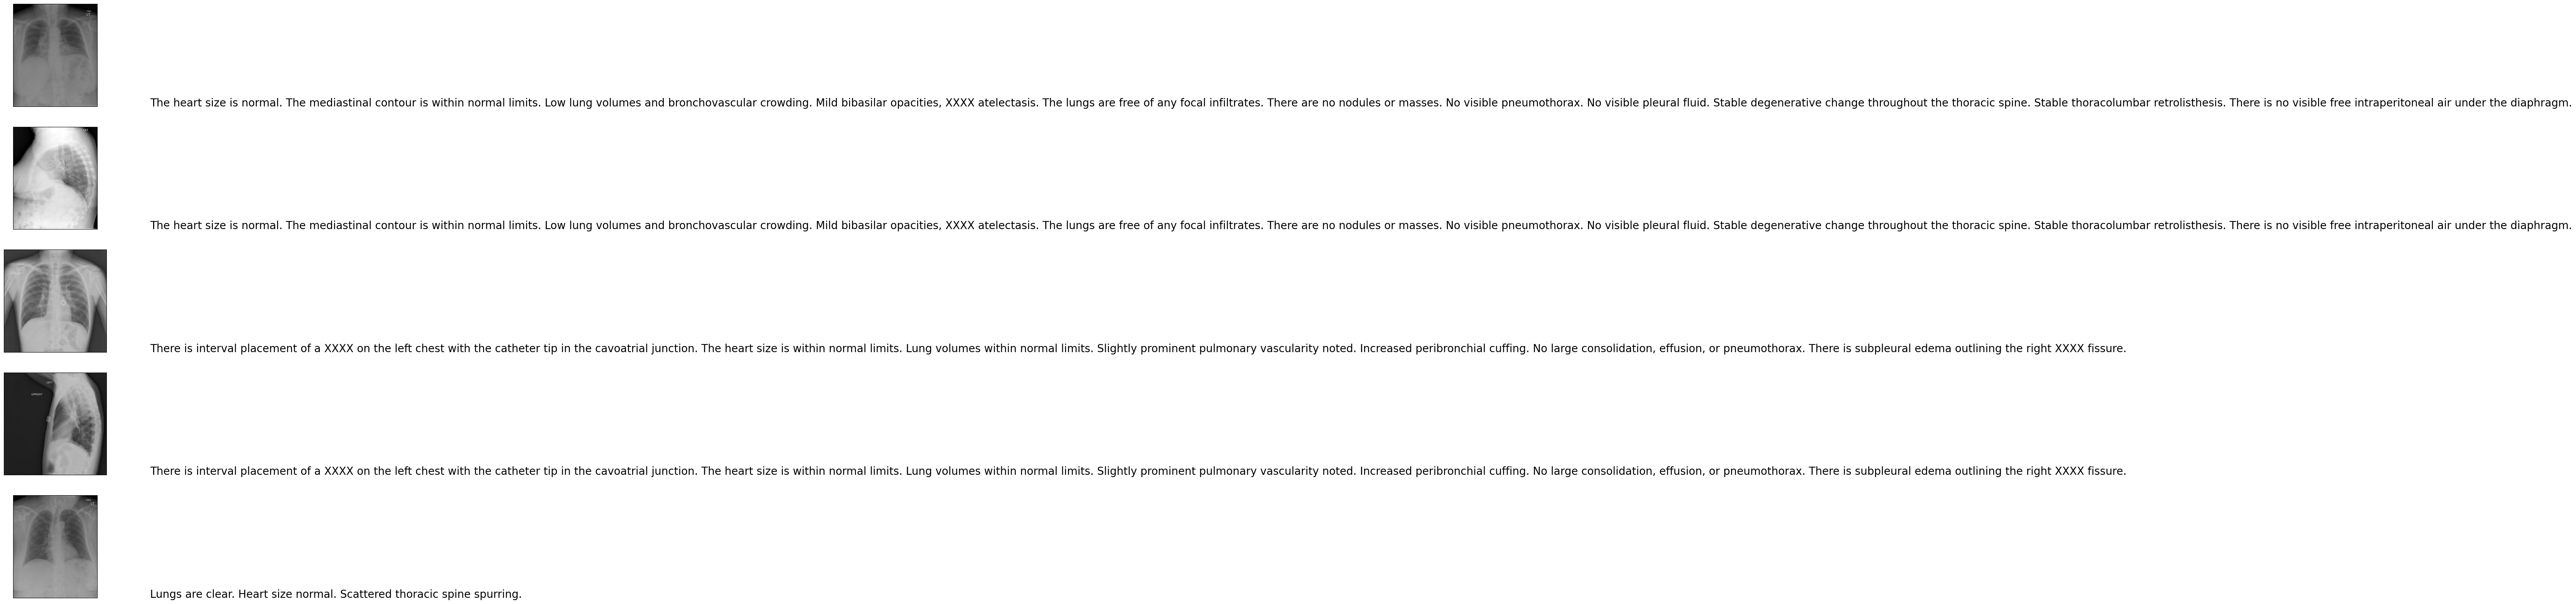

In [10]:
image_desc_plotter(dataset, 5, 'finding')


In [11]:
# loading the heights and widths of each image
h = []
w = []
for i in tqdm(np.unique(dataset['Image_path'].values)):
    img = cv2.imread(i)
    h.append(img.shape[0])
    w.append(img.shape[0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7470/7470 [00:35<00:00, 208.39it/s]


<Axes: title={'center': 'Width Plot'}, xlabel='--Images--', ylabel='Widths'>

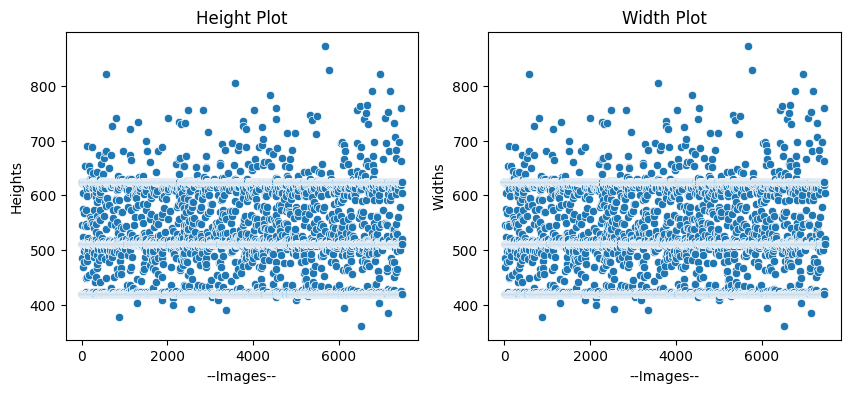

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(h)
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(w)

In [13]:
print('Number of Images:', dataset['Image_path'].nunique())


Number of Images: 7470


In [14]:
# number of missing values
dataset.isnull().sum()

Image_path      0
Finding       997
dtype: int64

In [15]:
dataset = dataset.dropna(axis=0) # drop all missing value rows


In [16]:
dataset.isnull().sum()


Image_path    0
Finding       0
dtype: int64

In [17]:
print('New Shape of the Data:', dataset.shape)


New Shape of the Data: (6473, 2)


In [18]:
dataset.head(12)


,Image_path,Finding
0,/home/mxochicale/repositories/budai4medtech/am...,There are diffuse bilateral interstitial and a...
1,/home/mxochicale/repositories/budai4medtech/am...,There are diffuse bilateral interstitial and a...
2,/home/mxochicale/repositories/budai4medtech/am...,The heart size and mediastinal contours appear...
3,/home/mxochicale/repositories/budai4medtech/am...,The heart size and mediastinal contours appear...
4,/home/mxochicale/repositories/budai4medtech/am...,The XXXX examination consists of frontal and l...
5,/home/mxochicale/repositories/budai4medtech/am...,The XXXX examination consists of frontal and l...
6,/home/mxochicale/repositories/budai4medtech/am...,The heart size and mediastinal contours appear...
7,/home/mxochicale/repositories/budai4medtech/am...,The heart size and mediastinal contours appear...
8,/home/mxochicale/repositories/budai4medtech/am...,The heart and lungs have XXXX XXXX in the inte...
9,/home/mxochicale/repositories/budai4medtech/am...,The heart and lungs have XXXX XXXX in the inte...


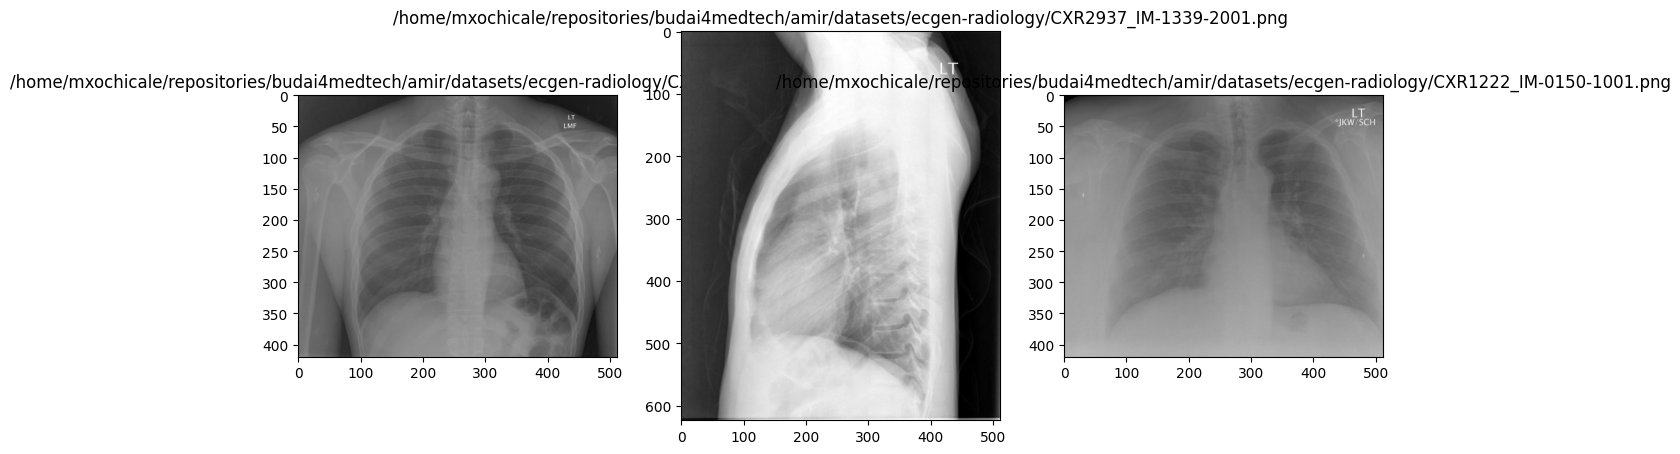

In [19]:
plt.figure(figsize=(14,7))
plt.subplot(131)
img1 = cv2.imread(dataset['Image_path'].values[6])
plt.imshow(img1)
plt.title(dataset['Image_path'].values[6])
plt.subplot(132)
img2 = cv2.imread(dataset['Image_path'].values[7])
plt.title(dataset['Image_path'].values[7])
plt.imshow(img2)
plt.subplot(133)
img3 = cv2.imread(dataset['Image_path'].values[8])
plt.title(dataset['Image_path'].values[8])
plt.imshow(img3)

In [20]:
dataset['Finding'].values[6], dataset['Finding'].values[7], dataset['Finding'].values[8]


('The heart size and mediastinal contours appear within normal limits. No focal airspace consolidation, pleural effusion or pneumothorax. No acute bony abnormalities.',
 'The heart size and mediastinal contours appear within normal limits. No focal airspace consolidation, pleural effusion or pneumothorax. No acute bony abnormalities.',
 'The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.')

## The dataset consists of multiple chest shots of the same person. The images of a person has the same file name except the last 4 digits. Therefore that can be taken as the person ID.


In [21]:
# This creates 2 dictionaries with keys as the person id and the number of images and findings for that person. 
images = {}
findings = {}
for img, fin in dataset.values:
    a = img.split('-')
    a.pop(len(a)-1)
    a = '-'.join(e for e in a)
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else:
        images[a] += 1
        findings[a] = fin

In [22]:
#TODO
#images['Scanned Images/CXR1001_IM-0004'], findings['Scanned Images/CXR1001_IM-0004']
#...
# and all the remaining reprodubible bits in
# https://towardsdatascience.com/image-captioning-using-deep-learning-fe0d929cf337
